<a href="https://colab.research.google.com/github/Bmartins25/Data_Mining_UFMG/blob/main/TP_UFMG_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-02d01f291060>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['CIDADE'] = label_encoder_city.fit_transform(df_model['CIDADE'])
<ipython-input-9-02d01f291060>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['UF'] = label_encoder_uf.fit_transform(df_model['UF'])


Root Mean Squared Error: 75.75011774167538


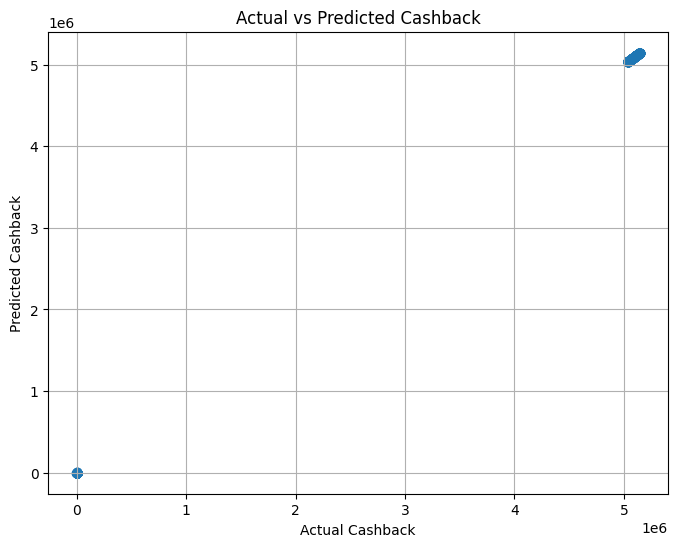

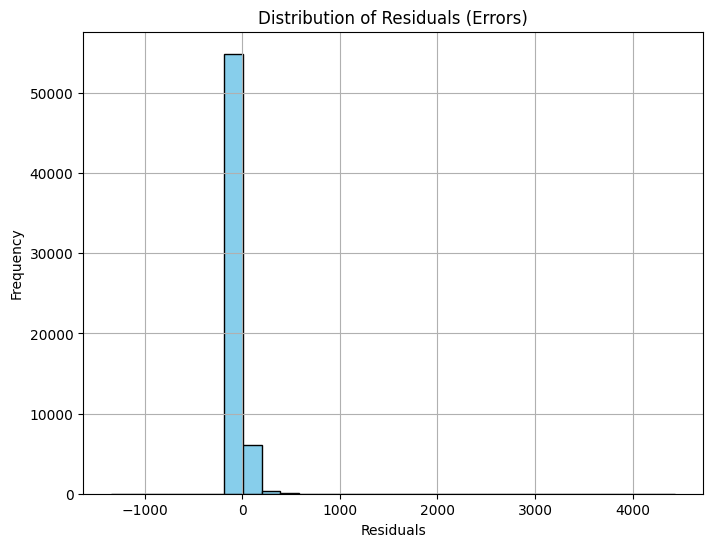

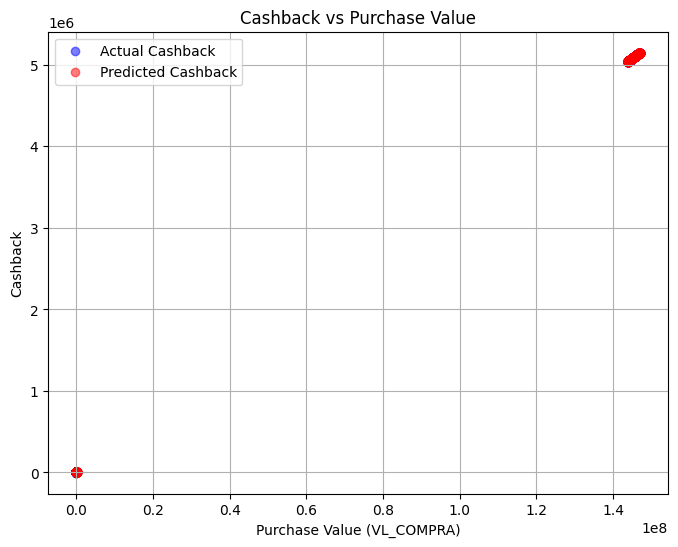

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/Base_Case_Marketplace.xlsx', sheet_name='TesteInter')

# Select relevant columns
df_model = df[['CASHBACK', 'VL_COMPRA', 'ID_LOJA', 'CIDADE', 'UF']]

# Convert categorical variables to numeric using Label Encoding
label_encoder_city = LabelEncoder()
label_encoder_uf = LabelEncoder()

df_model['CIDADE'] = label_encoder_city.fit_transform(df_model['CIDADE'])
df_model['UF'] = label_encoder_uf.fit_transform(df_model['UF'])

# Features and target
X = df_model[['VL_COMPRA', 'ID_LOJA', 'CIDADE', 'UF']]
y = df_model['CASHBACK']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Visualization 1: Scatter plot of actual vs predicted cashback values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Cashback')
plt.xlabel('Actual Cashback')
plt.ylabel('Predicted Cashback')
plt.grid(True)
plt.show()

# Visualization 2: Histogram of residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization 3: Cashback vs Purchase Value with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test['VL_COMPRA'], y_test, color='blue', label='Actual Cashback', alpha=0.5)
plt.scatter(X_test['VL_COMPRA'], y_pred, color='red', label='Predicted Cashback', alpha=0.5)
plt.title('Cashback vs Purchase Value')
plt.xlabel('Purchase Value (VL_COMPRA)')
plt.ylabel('Cashback')
plt.legend()
plt.grid(True)
plt.show()
